A certain food-based company conducted a survey with the help of a fitness company to find the relationship between a person’s weight gain and the number of calories they consumed in order to come up with diet plans for these individuals. Build a Simple Linear Regression model with calories consumed as the target variable. Apply necessary transformations and record the RMSE and correlation coefficient values for different models. 

In [1]:
# Importing libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import scipy
import warnings
warnings.filterwarnings(action='ignore',category=UserWarning)

In [2]:
# Importing dataset
data = pd.read_csv('C:/Users/vaibh/Desktop/360 Digitmg/SImple Regression\Asssignments/calories_consumed.csv')
data.head()

,Weight gained (grams),Calories Consumed
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500


In [3]:
# checking dimensions of the dataset
data.shape

(14, 2)

In [4]:
# checking for null values
data.isnull().sum()

Weight gained (grams)    0
Calories Consumed        0
dtype: int64

There are no null values

In [5]:
# checking for duplicate value
data.duplicated().sum()

0

There are no duplicate values

In [6]:
# Descriptive statistics of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight gained (grams),14.0,357.714286,333.692495,62.0,114.5,200.0,537.5,1100.0
Calories Consumed,14.0,2340.714286,752.109488,1400.0,1727.5,2250.0,2775.0,3900.0


In [7]:
# Info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Weight gained (grams)  14 non-null     int64
 1   Calories Consumed      14 non-null     int64
dtypes: int64(2)
memory usage: 352.0 bytes


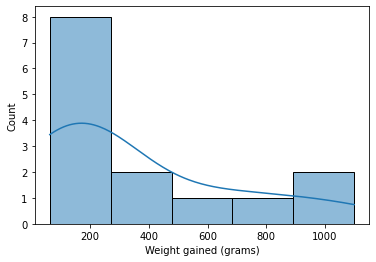

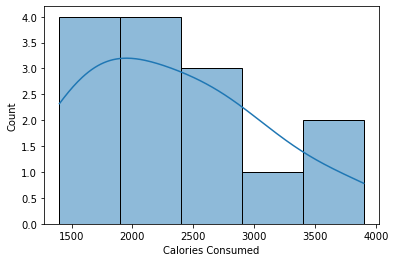

In [8]:
# Plotting histogram to check distribution of the features
sns.histplot(data['Weight gained (grams)'],kde=1);plt.show()
sns.histplot(data['Calories Consumed'],kde=1);plt.show()

The data seems to be right skewed

<AxesSubplot:>

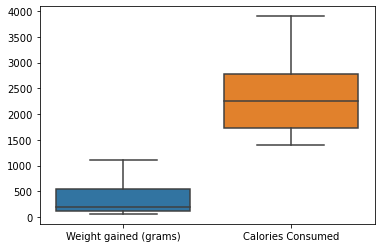

In [9]:
# Checking for outliers
sns.boxplot(data = data)

There are no outliers in the dataset

<AxesSubplot:xlabel='Calories Consumed', ylabel='Weight gained (grams)'>

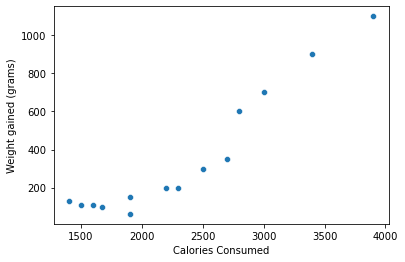

In [10]:
sns.scatterplot(y = data['Weight gained (grams)'], x = data['Calories Consumed'])

In [11]:
# Correlation between the features
data.corr()

,Weight gained (grams),Calories Consumed
Weight gained (grams),1.000000,0.946991
Calories Consumed,0.946991,1.000000


There is high correlation between the two features Weight gained and Calories consumed

In [12]:
# Rename columns
data = data.rename(columns = {'Weight gained (grams)':'Weight','Calories Consumed':"Calories"})

# MODEL 1

In [13]:
# importing statsmodels for Simple Linear Regression

import statsmodels.formula.api as smf

model = smf.ols('Weight ~ Calories',data = data).fit()    # fiting the data to OLS model

In [14]:
# Summary of the model

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     104.3
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           2.86e-07
Time:                        09:58:48   Log-Likelihood:                -84.792
No. Observations:                  14   AIC:                             173.6
Df Residuals:                      12   BIC:                             174.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -625.7524    100.823     -6.206      0.000    -845.427    -406.078
Calories       0.4202      0.041     10.211      0.000       0.331       0.510
==============================================================================
Omnibus:                        3.394   Durbin-Watson:                   2.537
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                1.227
Skew:                          -0.203   Prob(JB):                        0.541
Kurtosis:                       1.608   Cond. No.                     8.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We get an R-squared value of 0.897

In [15]:
# Predicting the Weight based on the model 
pred1 = model.predict(data.Calories)
pred1

0        4.482599
1      340.607908
2      802.780209
3      298.592245
4      424.639236
5       46.498263
6      -37.533065
7      172.545254
8      550.686227
9     1012.858527
10      75.909227
11     172.545254
12     508.670563
13     634.717554
dtype: float64

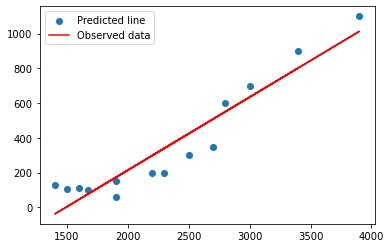

In [16]:
# Regression Line

plt.scatter(data.Calories, data.Weight)
plt.plot(data.Calories, pred1, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [17]:
# RMSE Error calculation (Model-1)

res1 = data.Weight - pred1
rmse1 = np.sqrt(np.mean(res1 * res1))

r_sqared1 = model.rsquared  
print(f'\nR-Squared value for model 1 : {r_sqared1}')
print(f'\nRMSE for model 1 : {rmse1}')


R-Squared value for model 1 : 0.8967919708530552

RMSE for model 1 : 103.30250194726932


# MODEL 2

Using log of x

In [18]:
model2 = smf.ols('Weight ~ np.log(Calories)',data = data).fit()
summary2 = model2.summary() ; print(summary2)                    # Model summary 
r_sqared2 = model2.rsquared                                      # Model r-squared value

pred2 = model2.predict(data.Calories)                            # Using the model to predict 

res2 = data.Weight - pred2                                       # Calculating Error between actual and predicted 
rmse2 = np.sqrt(np.mean(res2 * res2))
print(f'\nR-Squared value for model 2 : {r_sqared2}')
print(f'\nRMSE for model 2 : {rmse2}')

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     50.40
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           1.25e-05
Time:                        09:58:49   Log-Likelihood:                -89.148
No. Observations:                  14   AIC:                             182.3
Df Residuals:                      12   BIC:                             183.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -6955.6501   1030.908  

# MODEL 3

Using log of y and log of x

In [19]:
model3 = smf.ols('np.log(Weight) ~ np.log(Calories)',data = data).fit()
summary3 = model3.summary() ; print(summary3)                    # Model summary 
r_sqared3 = model3.rsquared                                      # Model r-squared value

pred3 = model3.predict(data.Calories)                            # Using the model to predict 

res3 = data.Weight - pred3                                       # Calculating Error between actual and predicted 
rmse3 = np.sqrt(np.mean(res3 * res3))
print(f'\nR-Squared value for model 3 : {r_sqared3}')
print(f'\nRMSE for model 3 : {rmse3}')

                            OLS Regression Results                            
Dep. Variable:         np.log(Weight)   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     66.17
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           3.17e-06
Time:                        09:58:49   Log-Likelihood:                -4.9095
No. Observations:                  14   AIC:                             13.82
Df Residuals:                      12   BIC:                             15.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -14.9275      2.512  

# MODEL 4

Using polynomial relationship between x and y

In [20]:
model4 = smf.ols('np.log(Weight) ~ Calories + I(Calories*Calories)',data = data).fit()
summary4 = model4.summary() ; print(summary4)                    # Model summary 
r_sqared4 = model4.rsquared                                      # Model r-squared value

pred4 = model4.predict(data.Calories)                            # Using the model to predict 

res4 = data.Weight - pred4                                       # Calculating Error between actual and predicted 
rmse4 = np.sqrt(np.mean(res4 * res4))
print(f'\nR-Squared value for model 4 : {r_sqared4}')
print(f'\nRMSE for model 4 : {rmse4}')

                            OLS Regression Results                            
Dep. Variable:         np.log(Weight)   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     39.44
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           9.61e-06
Time:                        09:58:50   Log-Likelihood:                -3.3243
No. Observations:                  14   AIC:                             12.65
Df Residuals:                      11   BIC:                             14.57
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2

In [21]:
# Comparing R-squared and error for each model

results = pd.DataFrame([],index =['R-Squared', 'RMSE'])
results['Model_1'] = r_sqared1, rmse1
results['Model_2'] = r_sqared2, rmse2
results['Model_3'] = r_sqared3, rmse3
results['Model_4'] = r_sqared4, rmse4
results.T

,R-Squared,RMSE
Model_1,0.896792,103.302502
Model_2,0.807707,141.005382
Model_3,0.846496,476.436585
Model_4,0.877602,476.401078


Model_1 is the best model with the highest R-squared value and minimum RMSE

In [22]:
# Using train test split

from sklearn import model_selection

train, test = model_selection.train_test_split(data, test_size = 0.2)

In [23]:
# Using the best model (Model_1)
# Fitting the train data to the model

best_model = smf.ols('Weight~Calories',data = train).fit()

In [24]:
# Predicting for test data
best_pred_test = best_model.predict(test.Calories)
best_pred_test

6    -51.377550
9    998.559900
3    284.602434
dtype: float64

In [25]:
# RMSE Error calculation for test data

res_test = test.Weight - best_pred_test
rmse_test = np.sqrt(np.mean(res_test * res_test))

r_sqared_test = best_model.rsquared  
print(f'\nR-Squared value for test data : {r_sqared_test}')
print(f'\nRMSE for test data : {rmse_test}')


R-Squared value for test data : 0.8730297900182804

RMSE for test data : 128.61307769373522


In [26]:
# Predicting for train data
best_pred_train = best_model.predict(train.Calories)

# RMSE Error calculation for train data

res_train = train.Weight - best_pred_train
rmse_train = np.sqrt(np.mean(res_train * res_train))

r_sqared_train = best_model.rsquared  
print(f'\nR-Squared value for train data : {r_sqared_train}')
print(f'\nRMSE for train data : {rmse_train}')


R-Squared value for train data : 0.8730297900182804

RMSE for train data : 96.54297088391158


The train and test data have the same rsquared value and very low RMSE values.

This model can be used to predict the Weight of the person depending on the calories intake.